In [4]:
import sys
sys.path.append(r'C:\Users\ablack.GAMRY\Documents\Jupyter\Supporting\Release')
from toolkitcommon import *
from toolkitcurves import *
import UniversalGraph as Graph
import numpy as np                       #Used to store and manipulate raw data output
import time                              #Used for script time delay
import pandas as pd                      #Used for presenting data in tables
import matplotlib.pyplot as plt          #Used to plot data
from scipy import stats                  #Used for linear regression
import csv                               #Used to export data as csv files
import traceback                         #Used for error catching
import math
from matplotlib import pyplot as plt     #Used for plotting
%matplotlib notebook 
#matplolib notebook activates QT GUI for dynamic plots
from mpl_point_clicker import clicker    #Used for manual baseline correction
def RunOCV(Filename):
    toolkitpy_init("RunPyBind")
    FileName = Filename
    pstat = PyPstat("PSTAT")  
    pstat.set_ctrl_mode(PSTATMODE)
    curve = OCVWrapper(pstat,10000)
    Time = 30
    SampleRate = 0.1
    pstat.set_cell(False)
    try:

        SampleMode = 1 
        Signal = pstat.signal_const_new(0,Time, SampleRate, PSTATMODE)
        pstat.set_signal_const(Signal)
        pstat.init_signal()
        data_frame = dict()
        fig = plt.figure()
        ax = fig.gca()

        curve.run(True);
        while curve.running():
            data = curve.acq_data()
            np.savetxt(FileName, data, delimiter = ',', header = 'Time (s), V (V), Current (Amp), Overload')
            Graph.plotOCV(curve, data,fig,ax)
            time.sleep(.01)
    except BaseException as err:
        #Error catching
        print(err)
        traceback.print_exception(*sys.exc_info())
        #Pstat.SetCell (CELLSTATE.OFF)
        raise
    return data


<IPython.core.display.Javascript object>


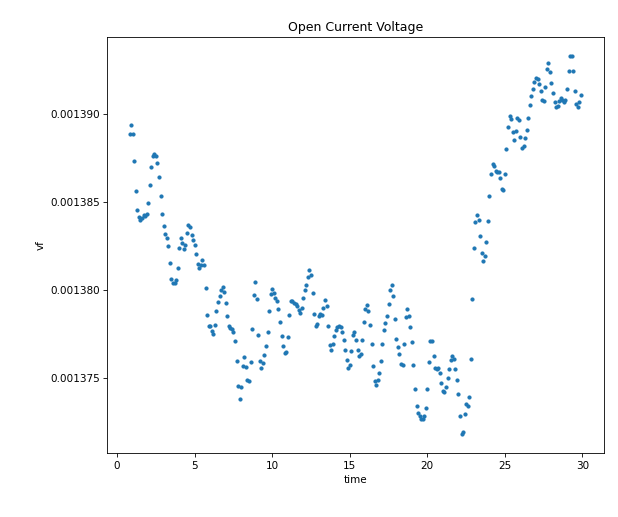

In [5]:
data = RunOCV("Bruh.DTA")